# Linear regression

In [2]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("ex1data1.txt",names=['population', 'profit'])

In [4]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


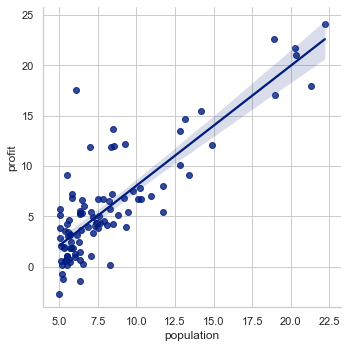

In [6]:
sns.lmplot(x='population', y='profit', data=df, fit_reg=True) #fit_reg 如果是True，估计并绘制一个与x和y变量相关的回归模型。

In [7]:
def get_x(df):
    '''
    将x与y分离出来，并为x拼上一列为1的向量
    '''
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df],axis=1)
    return np.mat(data.iloc[:,:-1].values)

def get_y(df):
    return np.mat(np.array(df.iloc[:, -1])).T

def normalize_feature(df):
    df.apply(lambda colcum : (coloum - coloum.mean())/coloum.std())

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [8]:
def costFunction(x,y,theta):
    inner_sum = np.power((x * theta-y),2)
    return np.sum(inner_sum)/(2*len(x))

In [134]:
x = get_x(df)
y = get_y(df)
print(x.shape, y.shape)
x

(97, 2) (97, 1)


matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [140]:
theta = np.mat(np.zeros((2,1)))

In [141]:
cost = costFunction(x,y,theta)
cost

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$


In [148]:
def gradientDecent(x,y,alpha,theta,iterm):
    theta_history = np.zeros((iterm,theta.shape[0],theta.shape[1]))
    temp_theta = np.mat(np.zeros((theta.shape)))
    nums = theta.shape[0]
    cost = np.zeros(iterm)
    for i in range(iterm):
        error = x * theta - y              
        for j in range(nums):
            temp_theta[j,0] = theta[j,0] - alpha / len(x) * np.sum(np.multiply(error , x[:,j]))       
        theta = temp_theta
        theta_history[i]=theta
        cost[i] = costFunction(x, y, theta)
    return theta_history,cost

In [191]:
x = get_x(df)
y = get_y(df)
alpha = 0.024
iterm = 3000
theta = np.mat(np.zeros((2,1)))
thetas, cost = gradientDecent(x,y,alpha,theta,iterm)

In [193]:
np.argmin(cost)

2999

In [200]:
theta = thetas[np.argmin(cost)]
theta

array([[-3.89577195],
       [ 1.19303275]])

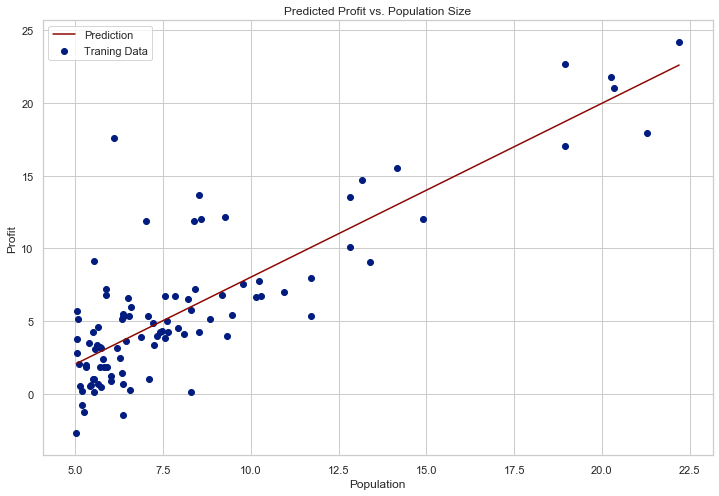

In [198]:
x = np.linspace(df.population.min(), df.population.max(), 100)
f = theta[0, 0] + (theta[1,0] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

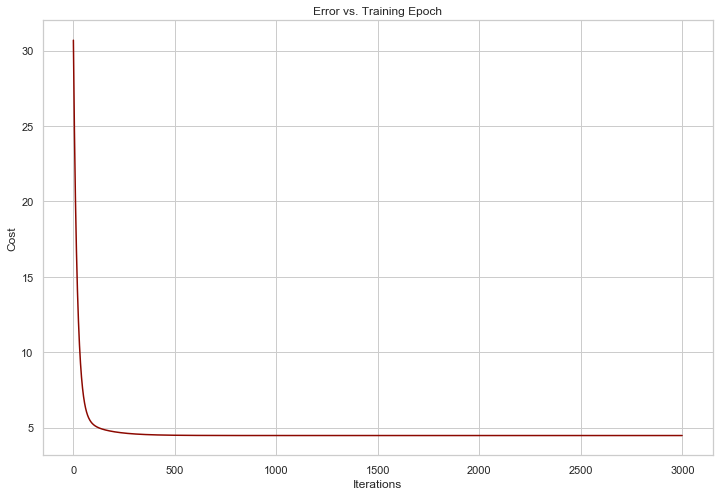

In [199]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterm), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [201]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [204]:
x = get_x(df)
y = get_y(df)
final_theta2=normalEqn(x, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])